In [1]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
import scipy as sp
import sklearn
from sklearn.model_selection import train_test_split
%matplotlib inline

/Users/ikuma/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/Users/ikuma/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles
X,y = make_circles(noise=0.25,factor=0.5,random_state=1)
#わかりやすいようにクラスを"blue"と"red"にする
y_named=np.array(["blue","red"])[y]

#train_test_splitは任意の数の配列に適用
#全ての配列は整合するように分割される
X_train,X_test,y_train_named,y_test_named,y_train,y_test=train_test_split(X,y_named,y,random_state=0)
#勾配ブースティングモデルを構築
gbrt=GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train,y_train_named)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [3]:
print(X_test.shape)
print(gbrt.decision_function(X_test).shape)

(25, 2)
(25,)


In [4]:
#decisionの最初のいくつかを表示
#正であれば陽性、負であれば陰性
print(gbrt.decision_function(X_test)[:6])

[ 4.13592629 -1.7016989  -3.95106099 -3.62599351  4.28986668  3.66166106]


In [9]:
print(gbrt.decision_function(X_test)>0)
print(gbrt.predict(X_test))

[ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]
['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']


In [11]:
#True/Falseを0/1に
greater_zero=(gbrt.decision_function(X_test)>0).astype(int)
#0/1をclasses_のインデックスに使う
pred=gbrt.classes_[greater_zero]
#predはgbrt.predictの出力と同じになる
print(np.all(pred == gbrt.predict(X_test)))

True


In [12]:
decision_function = gbrt.decision_function(X_test)
print(np.min(decision_function),np.max(decision_function))

-7.69097177301218 4.289866676868515


In [29]:
print(gbrt.predict_proba(X_test).shape)

(25, 2)


In [30]:
#predict_probaの出力の最初の数行を見る
#予測に対する確信度が表示されている
print(gbrt.predict_proba(X_test[:6]))

[[0.01573626 0.98426374]
 [0.84575649 0.15424351]
 [0.98112869 0.01887131]
 [0.97406775 0.02593225]
 [0.01352142 0.98647858]
 [0.02504637 0.97495363]]


In [ ]:
fig,axes = plt.subplots(1,2,figsize=(13,5))
mglearn.tools.plot_2d_separator(gbrt,X,ax=axes[0],alpha=.4,fill=True,cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt,X,ax=axes[1],alpha=.5,cm=mglearn.ReBl,function='predict_proba')

for ax in axes:
    #訓練データポイントとテストデータポイントをプロット
    mglearn.discrete_scatter(X_test[:,0],X_test[:,1],y_test,markers='^',ax=ax)
    mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train,markers='o',ax=ax)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
cbar = plt.colorbar(scores_image,ax=axes.tolist())
axes[0].legend(["Test class 0","Test class 1","Train class 0","Train class 1"],ncol=4,loc=(.1,1.1))

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
X_train,X_test,y_train,y_test = train_test_split(iris.data)

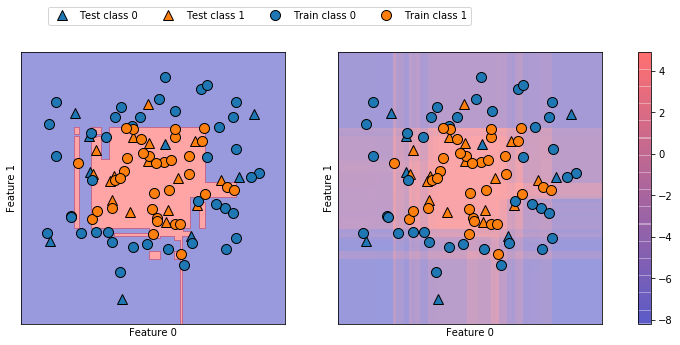

In [28]:
fig,axes = plt.subplots(1,2,figsize=(13,5))
mglearn.tools.plot_2d_separator(gbrt,X,ax=axes[0],alpha=.4,fill=True,cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt,X,ax=axes[1],alpha=.4,cm=mglearn.ReBl)

for ax in axes:
    #訓練データポイントとテストデータポイントをプロット
    mglearn.discrete_scatter(X_test[:,0],X_test[:,1],y_test,markers='^',ax=ax)
    mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train,markers='o',ax=ax)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
cbar = plt.colorbar(scores_image,ax=axes.tolist())
axes[0].legend(["Test class 0","Test class 1","Train class 0","Train class 1"],ncol=4,loc=(.1,1.1))

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
X_train,X_test,y_train,y_test = train_test_split(iris.data,iris.target,ranom_state=42)

gbrt = GradientBoostingClassifier(learning_rate=0.01,random_state=0)
gbrt.fit(X_train,y_train)

In [ ]:
print(gbrt.decision_function(X_test).shape)
print(gbrt.decision_funciton(X_test)[:6,:])

In [ ]:
print(np.argmax(gbrt.decision_function(X_test),axis=1))
print(gbrt.predict(X_test))

In [ ]:
#predict_probaの結果の最初の数行を表示
print(gbrt.predict_proba(X_test)[:6])
#各行の和がゼロになることを確認
print(gbrt.predict_proba(X_test)[:6].sum(axis=1))

In [ ]:
print(np.argmax(gbrt.predict_proba(X_test),axis=1))
print(gbrt.predict(X_test))

In [ ]:
logreg = LogisticRegression()

#irisデータセットのクラス名で表示する
named_target=iris.target_names[y_train]
logreg.fit(X_train,named_target)
print(logreg.classes_)
print(logreg.predict(X_test)[:10])
argmax_dec_func = np.argmax(logreg.decision_funciton(X_test),axis=1)
print(argmax_dec_func[:10])
print(logreg.classes_[argmax_dec_func][:10])